Processed image saved as: C:/Users/tpwm1502/Desktop/Computer_Vision/image1_processed.jpg


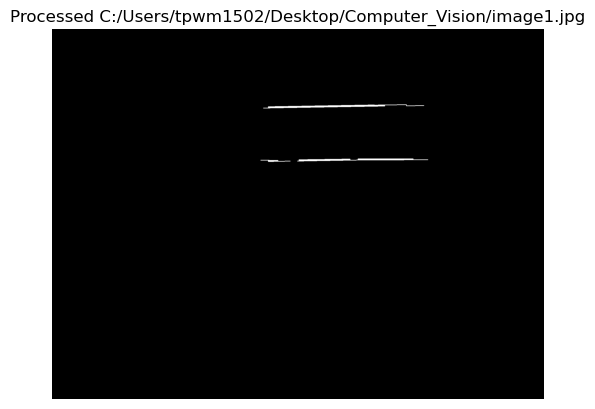

Processed image saved as: C:/Users/tpwm1502/Desktop/Computer_Vision/image2_processed.jpg


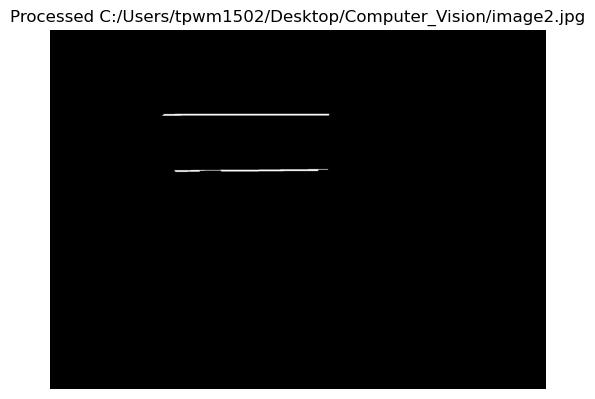

In [16]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """ Reads and blurs the image to reduce noise. """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None
    
    img_blur = cv2.GaussianBlur(img, (7, 7), 0)
    return img_blur

def detect_edges(image):
    """ Detects edges using Canny edge detection. """
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    return edges

def filter_horizontal_lines(edges):
    """ Detects and keeps only horizontal lines using Hough Transform. """
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=70, maxLineGap=20)
    
    filtered_lines = np.zeros_like(edges)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
            if -10 <= angle <= 10:  # Keep only near-horizontal lines
                cv2.line(filtered_lines, (x1, y1), (x2, y2), 255, 2)
    
    return filtered_lines

def post_process(image):
    """ Enhances detected lines by dilating and thinning them. """
    kernel = np.ones((7, 7), np.uint8)
    #dilated = cv2.dilate(image, kernel, iterations=1)
    #thinned = cv2.erode(dilated, kernel, iterations=1)
    # Perform morphological closing to fill gaps
    closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=2)
    
    # Perform dilation to make lines thicker
    dilated = cv2.dilate(closed, kernel, iterations=1)
    
    # Optionally perform erosion if needed, reduce iterations if necessary
    thinned = cv2.erode(dilated, kernel, iterations=1)
    return thinned

def process_image(image_path):
    """ Runs all processing steps on the image. """
    img_blur = preprocess_image(image_path)
    if img_blur is None:
        return None
    
    edges = detect_edges(img_blur)
    horizontal_lines = filter_horizontal_lines(edges)
    final_output = post_process(horizontal_lines)
    
    return final_output

# List of image file paths (update with correct names if needed)
image_paths = ["C:/Users/tpwm1502/Desktop/Computer_Vision/image1.jpg", "C:/Users/tpwm1502/Desktop/Computer_Vision/image2.jpg"]

# Process each image and save the output
for image_path in image_paths:
    output_image = process_image(image_path)
    
    if output_image is not None:
        # Save the processed image
        output_filename = os.path.splitext(image_path)[0] + "_processed.jpg"
        cv2.imwrite(output_filename, output_image)
        print(f"Processed image saved as: {output_filename}")
    
    # Optionally display the processed image
    plt.imshow(output_image, cmap='gray')
    plt.title(f"Processed {image_path}")
    plt.axis("off")
    plt.show()


In [4]:
print(image_paths)

['image1.jpg', 'image2.jpg']


In [7]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\tpwm1502
